# Mesa-Tutorial

In [ ]:
# This model is compatible with mesa version 1.1.1

## Learning objectives

At the end of this lecture, you should be able to:

1. Explain what OOP is (e.g., difference between class and instance of a class, inheritence, etc.)
2. Recall <u>some</u> main Python commands
3. Build a minimal agent-based-model using Mesa library having access to online/external support

At the end of this lecture, you <u>will not</u> be able to:

3. Create a (complex) Mesa model without facing challenges, even if you have access to external/online resources
4. Know all Python commands by heart

*Note: In this tutorial, we wil not cover all aspects of Mesa and Python. It is your responsibility (with the help of TAs) to aquire additional knowledge that you need*

*Advice:  Mesa library has many methods that can be very useful. Please consider going over the documentation instead of building these methods from scratch.*

## Installing Mesa

* For this tutorial, you will use Vocareum, where mesa library comes pre-installed.
* If you are not confident with Python, there is plenty of support online. We also prepared a Python refresher that you can use to catch up

## Accessing the answer form

#### Access the form using the QR code or the link below
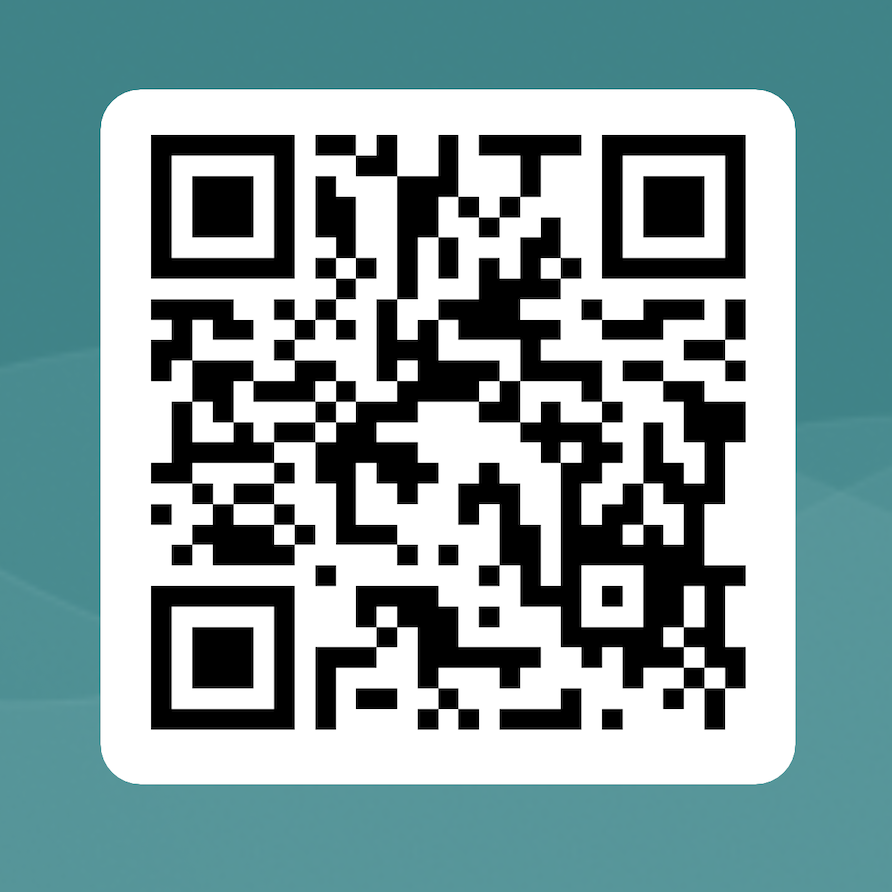

Link: https://forms.office.com/e/fSKhp3BMDq

#### Instruction on how to use the answer form
1. Scan QR code or type the link in your browser
2. Answer the question when instructed 
3. Submit the form
4. Go Back to the answer form to answer the next question (or click of the link on the submission page)

Note: You can team up with your neighbour to discuss questions

***Task: do exercises 1 and 2***

## 0. Mini lecture on classes

## 1. Setting up the model

This tutorial is based on https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html

In [ ]:
import mesa  # Import the Mesa framework for agent-based modeling

class MoneyAgent(mesa.Agent):
    """
    An agent with fixed initial wealth.
    This class represents an agent in our model. Each agent will have its own wealth.
    """

    def __init__(self, unique_id, model):
        # Initialize an agent with a unique ID and associate it with a model.
        super().__init__(unique_id, model)
        self.wealth = 1  # Each agent starts with a wealth of 1

class MoneyModel(mesa.Model):
    """
    A model with some number of agents.
    This class represents the overall model/environment in which our agents operate.
    """

    def __init__(self, N):
        # Initialize the model with N agents.
        self.num_agents = N  # Store the number of agents in the model

        # Create agents and add them to the model
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)  # Create a new MoneyAgent with a unique ID
            # Note: Here, you will need to add the agent 'a' to keep track of it, much like registering it in the model

***Task: do exercises 3, 4, and 5***

## 2. Scheduler and step method

Time in most agent-based models moves in steps, sometimes also called ticks. At each step of the model, one or more of the agents – usually all of them – are activated and take their own step, changing internally and/or interacting with one another or the environment.

In [ ]:
import mesa  # Import the Mesa library for agent-based modeling
import matplotlib.pyplot as plt  # Import matplotlib for plotting

class MoneyAgent(mesa.Agent):
    """
    An agent with fixed initial wealth.
    Each agent in this model has an initial wealth and a unique identifier.
    """

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)  # Initialize the base Agent class
        self.wealth = 1  # Set initial wealth of the agent to 1

    def step(self):
        """
        Define what the agent does in a single step.
        Here, the agent will simply print its unique_id.
        """
        print("Hi, I am agent " + str(self.unique_id) + ".")


class MoneyModel(mesa.Model):
    """
    A model with some number of agents.
    This class sets up the environment and the agents within it.
    """

    def __init__(self, N):
        self.num_agents = N  # Total number of agents in the model
        self.schedule = mesa.time.RandomActivation(self)  # Schedule to manage agent activation

        # Create agents and add them to the schedule
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)  # Create a MoneyAgent with a unique ID
            self.schedule.add(a)  # Add the agent to the schedule

    def step(self):
        """
        Advance the model by one step.
        In each step, every agent's 'step' method will be called.
        """
        self.schedule.step()  # Tell all agents in the schedule to take a step


In [ ]:
# Create a model instance with 10 agents
empty_model = MoneyModel(10)

# Advance the model by one step
empty_model.step()


***Task: do exercises 6, 7, and 8***

## 3. Agent/Model behaviour


Change the behaviour of the agent: each agent gives 1 wealth to a random agent if their wealth is greater than 0. Run a few steps of the model to see how the agent activation order is shuffled each step.

In [ ]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1  # Each agent starts with a wealth of 1

    def step(self):
        if self.wealth == 0:
            return  # If the agent has no wealth, it does nothing
        other_agent = self.random.choice(self.model.schedule.agents) # Choose another agent at random
        other_agent.wealth += 1  # Give 1 wealth to the chosen agent
        self.wealth -= 1  # The agent loses 1 wealth


### 3.1 Running your first model

In [ ]:
# Create an instance of the MoneyModel class with 10 agents
model = MoneyModel(10)

# Run the model for 10 steps
for i in range(10):
    model.step()



In [ ]:
# For a jupyter notebook add the following line:
%matplotlib inline

In [ ]:
agent_wealth = [a.wealth for a in model.schedule.agents]  # Collect the wealth of each agent into a list
plt.hist(agent_wealth)  # Plot a histogram of the wealth distribution


### 3.2 Model behaviour

To get a better idea of how a model behaves, we can create multiple model runs and see the distribution that emerges from all of them. We can do this with a nested for loop:

In [ ]:
all_wealth = []  # Initialize an empty list to store wealth data

# This loop runs the model 100 times
for j in range(100):
    model = MoneyModel(10)  # Create a new instance of the model with 10 agents
    for i in range(10):
        model.step()  # Run the model for 10 steps

    # Collect the wealth of each agent after the 10 steps
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

# Plot a histogram of the collected wealth data
plt.hist(all_wealth, bins=range(max(all_wealth) + 1))


*What if we want to get the same results everytime?*

---> We have to use random seed
Introducing a random seed in your code helps to ensure that the sequence of random numbers generated by your program is reproducible. This is particularly useful for debugging or for scientific simulations where reproducibility is key. Here's how you can use random.seed() in your code:

In [ ]:
import random  # Import the random module

# Uncomment the next line to make the randomness deterministic
# random.seed(1)

for i in range(5):
    print(random.choice([1, 2, 3, 4, 5]))  # Randomly choose and print a number from the list [1, 2, 3, 4, 5]


***Task: do exercise 9***

## 4. Mesa spaces

Mesa has two main types of grids: SingleGrid and MultiGrid*. SingleGrid enforces at most one agent per cell; MultiGrid allows multiple agents to be in the same cell. Since we want agents to be able to share a cell, we use MultiGrid.

In [ ]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N  # Number of agents
        self.grid = mesa.space.MultiGrid(width, height, torus=True)
        # MultiGrid allows multiple agents in a cell. 'torus=True' makes the grid wrap around.

        self.schedule = mesa.time.RandomActivation(self)  # Schedule for agent activation

        # Create agents and place them on the grid
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)  # Create an agent
            self.schedule.add(a)  # Add agent to the schedule

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))  # Place the agent at coordinates (x, y)


***Task: do exercise 10***

## 5. Moving Agents

In [ ]:
class MoneyAgent(mesa.Agent):
    # ... [previous methods like __init__ and step]

    def move(self):
        # Get the neighboring cells (Moore neighborhood includes diagonals)
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,  # Agent's current position
            moore=True,  # Moore neighborhood (includes diagonals)
            include_center=False)  # Exclude the cell where the agent is currently located

        new_position = self.random.choice(possible_steps)  # Choose a new position at random
        self.model.grid.move_agent(self, new_position)  # Move agent to the new position


We want to give money to one of the agents present at the same cell.

In [ ]:
class MoneyAgent(mesa.Agent):
    # ... [previous methods like __init__, step, and move]

    def give_money(self):
        # Get all agents in the same cell as this agent
        cellmates = self.model.grid.get_cell_list_contents([self.pos])

        if len(cellmates) > 1:  # Check if there is more than one agent in the cell
            other = self.random.choice(cellmates)  # Randomly select another agent in the same cell
            if other != self:  # Ensure the selected agent is not itself
                other.wealth += 1  # Increase the other agent's wealth
                self.wealth -= 1  # Decrease this agent's wealth


And with those two methods, the agent’s step method becomes:

In [ ]:
class MoneyAgent(mesa.Agent):
    # ... [previous methods like __init__, move, and give_money]

    def step(self):
        self.move()  # First, the agent moves to a new position
        if self.wealth > 0:
            self.give_money()  # If the agent has wealth, it gives money to another agent in the same cell


Now, putting that all together should look like this:

In [ ]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1  # Each agent starts with a wealth of 1

    def move(self):
        # Get the neighboring cells and choose one at random for movement
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        # Give money to another agent in the same cell, if any
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        # Agent action in each step: move, then possibly give money
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)  # MultiGrid allowing multiple agents per cell
        self.schedule = mesa.time.RandomActivation(self)  # Scheduler to activate agents

        # Create and place agents on the grid
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        # Advance all agents by one step
        self.schedule.step()


Let’s create a model with 50 agents on a 10x10 grid, and run it for 20 steps.

In [ ]:
model = MoneyModel(50, 10, 10)  # Initialize the model with 50 agents in a 10x10 grid

for i in range(20):
    model.step()  # Run the model for 20 steps


The provided code creates a visual representation of the agent distribution on the grid at a specific point in time in your MoneyModel simulation:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

agent_counts = np.zeros((model.grid.width, model.grid.height))

#for contents, (x, y) in model.grid.coord_iter():
#    agent_count = len(contents)
#    agent_counts[x][y] = agent_count
#Vocareum users should replace the three lines above with thise code:
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

# Ensure the number of colors is an integer
num_colors = int(np.max(agent_counts) - np.min(agent_counts) + 1)

# Define a discrete colormap
cmap = plt.cm.get_cmap('viridis', num_colors)

plt.imshow(agent_counts, interpolation='nearest', cmap=cmap, norm=colors.BoundaryNorm(range(int(np.min(agent_counts)), int(np.max(agent_counts)) + 2), cmap.N))
plt.colorbar(ticks=range(int(np.min(agent_counts)), int(np.max(agent_counts)) + 1))
plt.show


***Task: do exercise 11***

## 6. Collecting Data

Let’s add a DataCollector to the model with mesa.DataCollector, and collect two variables. At the agent level, we want to collect every agent’s wealth at every step. At the model level, let’s measure the model’s Gini Coefficient, a measure of wealth inequality.

*The coefficient ranges from 0 to 1, where 0 represents perfect equality (everyone has the same income) and 1 represents perfect inequality (one individual has all the income, and everyone else has none).*

In [ ]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]  # Gather wealth of all agents
    x = sorted(agent_wealths)  # Sort the wealth values
    N = model.num_agents  # Number of agents
    # Calculate the B index as part of the Gini formula
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B  # Compute and return the Gini coefficient



In [ ]:
import mesa
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        # Initialize a DataCollector
        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini},  # Model-level data: Gini coefficient
            agent_reporters={"Wealth": "wealth"}     # Agent-level data: Wealth of each agent
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [ ]:
model = MoneyModel(10, 10, 10)  # Initialize the model with 10 agents in a 10x10 grid

for i in range(100):
    model.step()  # Run the model for 100 steps


In [ ]:
gini = model.datacollector.get_model_vars_dataframe()  # Retrieve the Gini coefficient data
gini

In [ ]:
gini.plot()  # Plot the Gini coefficient over time

In [ ]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()  # Retrieve agent wealth data
agent_wealth.tail()  # Display the last few entries of the data

In [ ]:
agent_wealth.head()

***Task: do exercise 12***

## 7. Accessing Data: Pandas

Consider the multi-index DataFrame below

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation

# Create a dictionary with data
data = {
    'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada', 'Canada'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Toronto', 'Vancouver', 'Montreal'],
    'Population': [8398748, 3990456, 2705994, 2930000, 675218, 1763371],
    'Area (km^2)': [468.9, 1302, 606.1, 630.2, 115, 431.5]
}

# Convert the dictionary to a pandas DataFrame and set a multi-level index
df = pd.DataFrame(data).set_index(['Country', 'City'])

# Display the DataFrame
df


***Task: do exercises 13-17. You may use the internet to look up answers***

## 8. Visualization

 let’s have a visualization where we can watch the agents moving around the grid

In [ ]:
#This will only work on your local Jupyter and won't work in vocareum

def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "r": 0.5}

    if agent.wealth > 0:
        portrayal["Color"] = "red"
        portrayal["Layer"] = 0
    else:
        portrayal["Color"] = "grey"
        portrayal["Layer"] = 1
        portrayal["r"] = 0.2
    return portrayal

grid = mesa.visualization.CanvasGrid(agent_portrayal, 10, 10, 500, 500)
server = mesa.visualization.ModularServer(
    MoneyModel, [grid], "Money Model", {"N": 10, "width": 10, "height": 10}
)
server.port = 8544  # The default
server.launch()

In [ ]:
#For vocareum users, use this code for visualization

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt

# Initialize a new MoneyModel
model = MoneyModel(10, 10, 10)  # Make sure to define or import your MoneyModel and compute_gini function

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

# Adjust layout to make room for annotations
fig.subplots_adjust(bottom=0.2)

# Function to plot the grid at each step
def plot_grid(model):
    ax.clear()
    ax.set_xticks(range(model.grid.width))
    ax.set_yticks(range(model.grid.height))
    
    for agent in model.schedule.agents:
        if agent.wealth > 0:
            ax.scatter(agent.pos[1], agent.pos[0], facecolors='none', edgecolors='red', s=200)  # Bigger, hollow circle
        else:
            ax.scatter(agent.pos[1], agent.pos[0], color='grey', s=100)  # Smaller, filled circle
    
    # Labels and title
    ax.set_title(f"Money Model: Step {model.schedule.steps-2}", fontsize=16)
    
    # Setting fixed axes limits
    ax.set_xlim(-1, model.grid.width)
    ax.set_ylim(-1, model.grid.height)

# Annotations outside the figure
fig.text(0.1, 0.1, "Red: Wealth > 0", fontsize=8, color='red')  # Annotation outside the plot
fig.text(0.1, 0.05, "Grey: Wealth = 0", fontsize=8, color='grey')  # Annotation outside the plot

# Initial plot
plot_grid(model)

# Update function for the animation
def update(frame):
    model.step()
    plot_grid(model)

# Create the animation
anim = FuncAnimation(fig, update, frames=100, repeat=False, interval=200)

# Show the animation
HTML(anim.to_jshtml())


## Questions?

Difficulties knowing where to write what? that will get easier as you practice.

## Wrapping up

Learning objectives:

1. Explain what OOP is (e.g., difference between class and instance of a class, inheritence, etc.)

--> We discussed important concepts of Python, including but not limited to classes and inheritence


2. Recall <u>some</u> main Python commands

--> We practiced a wide range of python commands

3. Build a minimal agent-based-model using Mesa library having access to online/external support

--> We built a minimal agent based model using mesa library, going over most elements you will need in your project